Roll: 1703176

Q1. Fourier transformation for a signal with multiple frequencies and hertz

Q2.  CT 3 Question 1

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style

# **Solve 1**

In [ ]:
srate = 256 # Hz
t = np.arange(0.,1., 1/srate) # time vector in seconds

x1 = np.sin(2 * np.pi * 2 * t)  # first sinwave
x2 = 2 * np.cos(2 * np.pi * 4 * t)  # second coswave
x3 = x1 + x2
DC = 2
x4 = x3 + DC

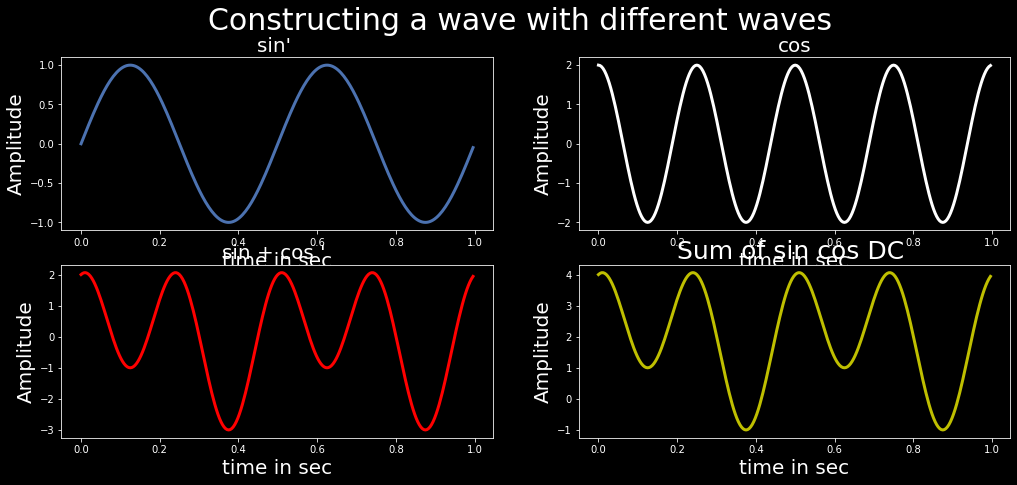

In [ ]:
# Plot every cos wave
plt.figure(figsize = (17, 7)) #set the size of figure
plt.suptitle('Constructing a wave with different waves', fontsize = 30)
style.use('seaborn-deep')
plt.subplot(2, 2, 1)
plt.plot(t, x1, linewidth = 3)
plt.title("sin' ", fontsize = 20)
plt.xlabel('time in sec', fontsize = 20)
plt.ylabel('Amplitude', fontsize = 20)


plt.subplot(2, 2, 2)
plt.plot(t, x2, 'w', linewidth = 3)
plt.title("cos", fontsize = 20)
plt.xlabel('time in sec', fontsize = 20)
plt.ylabel('Amplitude', fontsize = 20)


plt.subplot(2, 2, 3)
plt.plot(t, x3,'r', linewidth = 3)
plt.title("sin + cos ' ", fontsize = 20)
plt.xlabel('time in sec', fontsize = 20)
plt.ylabel('Amplitude', fontsize = 20)


plt.subplot(2, 2, 4)
plt.plot(t, x4, 'y', linewidth = 3)
plt.title("Sum of sin cos DC ", fontsize = 25)
plt.xlabel('time in sec', fontsize = 20)
plt.ylabel('Amplitude', fontsize = 20)

plt.show()

In [ ]:
X = np. zeros(len(x4), dtype=complex) # graph e index of frequency show korbe


for freq in range(0, len(t)):
  # create complex sine wave and compute dot product with signal
  csw = np.exp(-1j * 2 * np.pi * freq * t)
  X[freq] = np.sum(np.multiply(x4, csw))

# extract amplitudes

amps = 2 * np.abs(X)/ len(t) #amps array, size 256, fourier coeff ke abs korle amplitude pabo, so we get net amplitude after dividing with len(t)


In [ ]:
import math
Nyquist = srate/2
Hz = np.linspace(0, Nyquist, math.floor(len(t)/2 + 1))
energy_sp = np.abs(amps) ** 2

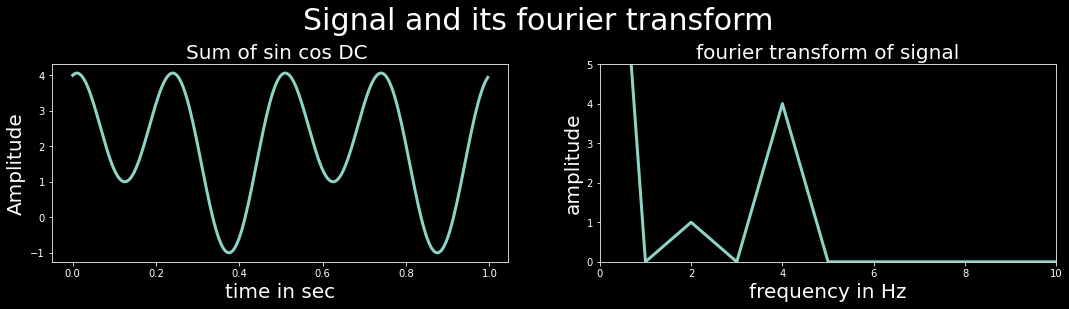

In [ ]:
plt.figure(figsize = (18,8)) #set the size of the figure
plt.suptitle('Signal and its fourier transform', fontsize=30)
style.use('dark_background')

plt.subplot(2,2,1)
plt.plot(t,x4, linewidth = 3)
plt.title("Sum of sin cos DC ", fontsize = 20)
plt.xlabel('time in sec', fontsize = 20)
plt.ylabel('Amplitude', fontsize = 20)

plt.subplot(2,2,2)
plt.plot(Hz, energy_sp[range(0, len(Hz))], linewidth = 3)

plt.xlim(0, 10)
plt.ylim(0,5)
plt.title("fourier transform of signal", fontsize = 20)
plt.xlabel("frequency in Hz", fontsize = 20)
plt.ylabel('amplitude', fontsize = 20)

plt.show()

# **Solve 2**

In [ ]:
# x(0) = 2, x(1) = -2, x(2) = 1

#eqn  ck = 1/N sum of x(n) e^-2*j*pi*(n/N)*k

#k=012
#n=012
#N = 3
N = 3
x = [2,-2,1]
xx = np.array(x)
ck = np.zeros(N, dtype=complex)
ck_val = [0,0,0]
ck_mag = np.array(ck_val)
ck_angle = [0,0,0]
ck_phase = np.array(ck_angle)

for i in range(N):  #i = k
    for j in range(N): #j = n
        ck[i]+= 1/N * xx[j] * np.exp(-2j*np.pi*i*j/N)

    print(ck[i])

    r = ck[i].real
    im = ck[i].imag



    ck_mag[i] = np.sqrt(r**2 + im**2)
    print(ck_mag[i])
    ck_phase[i] = np.angle(ck[i])
    print(ck_phase[i])



(0.3333333333333333+0j)
0
0
(0.833333333333333+0.8660254037844385j)
1
0
(0.8333333333333338-0.8660254037844386j)
1
0


<ipython-input-28-ce10246ef3e2>:6: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(ck_mag)
<ipython-input-28-ce10246ef3e2>:9: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(ck_phase)
<ipython-input-28-ce10246ef3e2>:16: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_lin

<StemContainer object of 3 artists>

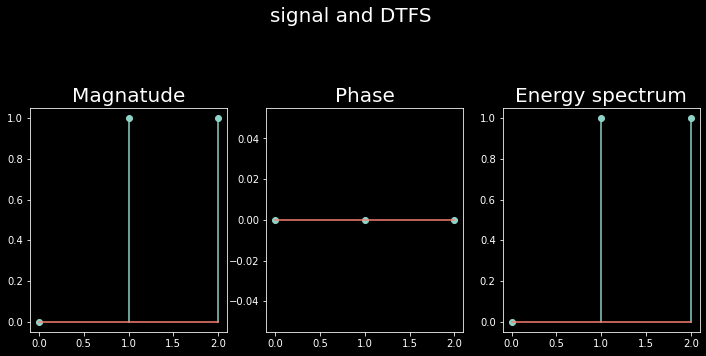

In [ ]:
plt.figure(figsize=(12,14))
plt.suptitle('signal and DTFS ',fontsize=20)

plt.subplot(3,3,1)
plt.title("Magnatude",fontsize=20)
plt.stem(ck_mag)
plt.subplot(3,3,2)
plt.title("Phase",fontsize=20)
plt.stem(ck_phase)
plt.subplot(3,3,3)
plt.title("Energy spectrum",fontsize=20)
p=[0,0,0]
for i in range(0,3,1):
  p[i]=ck_mag[i]**2

plt.stem(p)